### SVM

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
DATADIR = '/home/lenin/Documents/kaggle/color_classification/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

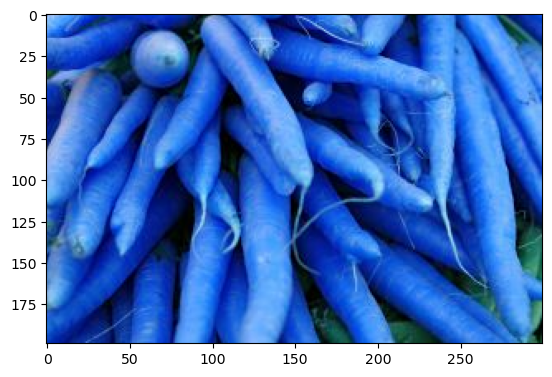

In [25]:
#verifico que reconozca los directorios y obtenga la imagen
#recorro ciclos una sola vez
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [26]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [27]:
print(len(training_data))

107


In [28]:
#legth del totol de datos train para usarlos despues
lenofimage = len(training_data)

In [29]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
#X = tf.keras.utils.normalize(X, axis = 1)

In [30]:
X = X/255.0
y=np.array(y)
print(y.shape)
print(X.shape)

(107,)
(107, 30000)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [32]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [33]:
y2 = svc.predict(X_test)

In [34]:
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8148148148148148


In [35]:
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.80      1.00      0.89         4
           2       1.00      0.67      0.80         6
           3       1.00      0.33      0.50         3
           5       0.50      0.50      0.50         2
           6       0.86      1.00      0.92         6
           7       0.80      1.00      0.89         4

    accuracy                           0.81        27
   macro avg       0.80      0.79      0.76        27
weighted avg       0.85      0.81      0.80        27



In [36]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,2,2
1,3,3
2,6,6
3,6,6
4,6,6
5,7,7
6,6,6
7,0,0
8,6,6
9,2,2
